In [7]:

import numpy as np
import random
def load_data(data_num, k,dt):
    # Load data
    x = []  # data

    np.random.seed(0)
    for i in range(k):
        x.extend(np.random.normal(loc=[i*dt,i*dt], scale=0.5, size=(data_num, 2)).tolist()) # *2.5 데이터 거리 구분 위함 
        if i == 0:
            real_answer = [0] * data_num
        else:
            real_answer.extend([i]*data_num)
    
    x = np.array(x)
    #sns.scatterplot(x=x[:,0], y=x[:,1]) #기존 그래프 그리기

    return x, real_answer

x, real_answer = load_data(1000, 3,2.5)

In [9]:
import math
def cal_distance(x, y): 
    '''
    유클리디안 거리 계산 함수
    '''
    sum = 0
    for a, b in zip(x,y):
        sum += (a-b)**2
    return math.sqrt(sum)

In [66]:
def center_initialize(x,k):
    M = []
    indices = []

    index = np.random.choice(len(x), size=1, replace=False)
    indices.append(int(index))
    M.append(x[index])
    while len(indices) < 3:
        dist_list=[]
        for i in x:
            if i in x[indices]:
                dist_list.append(0) #index 채워주기용
            else:
                dist_list.append(cal_distance(i, x[indices].mean(axis=0))) # centroid 간의 중심점
        max_index = dist_list.index(max(dist_list))
        indices.append(max_index)
    centers = x[indices]
    return centers

new_x = center_initialize(x,4)

In [69]:
def cal_mid_centroid(new_x, k):
    x2_x = new_x[1][0]
    x2_y = new_x[1][1]
    x3_x = new_x[2][0]
    x3_y = new_x[2][1]
    mid_centroid_x = []
    mid_centroid_y = []
    if (x2_x>x3_x) == True:
        for i in range(k):
            new_middle = 0
            ratio = (x2_x - x3_x) / k-1
            new_middle += (x3_x + ratio * i)
            mid_centroid_x.append(new_middle)
    if (x2_x>x3_x) == False:
        for i in range(k):
            new_middle = 0
            ratio = (x3_x - x2_x) / k-1
            new_middle += (x2_x + ratio * i)
            mid_centroid_x.append(new_middle)
    if (x2_y>x3_y) == True:
        for i in range(k):
            new_middle = 0
            ratio = (x2_y - x3_y) / k-1
            new_middle += (x3_y + ratio * i)
            mid_centroid_y.append(new_middle)
    if (x2_y>x3_y) == False:
        for i in range(k):
            new_middle = 0
            ratio = (x3_y - x2_y) / k-1
            new_middle += (x2_y + ratio * i)
            mid_centroid_y.append(new_middle)

    return np.c_[np.array(mid_centroid_x), np.array(mid_centroid_y)]

In [70]:
cal_mid_centroid(new_x, 3)

array([[-1.4011014 , -0.59421221],
       [ 0.96462687,  1.74148694],
       [ 3.33035513,  4.0771861 ],
       [ 5.6960834 ,  6.41288525]])

In [36]:
x3_x, x2_x

(-1.4011013991958565, 5.6960834000510285)

In [25]:
new_x[1], new_x[2]

(array([5.6960834 , 6.41288525]), array([-1.4011014 , -0.59421221]))

In [18]:
(new_x[1] + new_x[2]) / 2

array([2.147491  , 2.90933652])

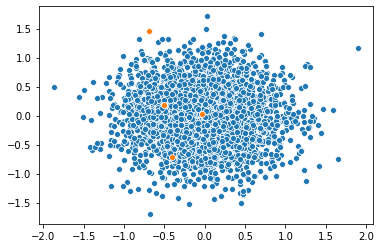

In [5]:
import seaborn as sns
centers = x[np.random.choice(len(x), size=4, replace=False)]
sns.scatterplot(x=x[:,0], y=x[:,1]) #기존 그래프 그리기
sns.scatterplot(x=centers[:,0], y=centers[:,1]) #기존 그래프 그리기

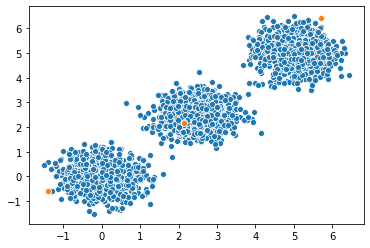

In [12]:
sns.scatterplot(x=x[:,0], y=x[:,1]) #기존 그래프 그리기
new_x = center_initialize(x,4)
sns.scatterplot(x=new_x[:,0], y=new_x[:,1]) #기존 그래프 그리기

In [150]:
dist_list=[]
first_centrioid = x[0]
for i in x:
    dist_list.append(cal_distance(i, x[0]))

dist_list.index(max(dist_list))

167

In [159]:
# 랜덤으로 1개 출력
M = []
indices = []

index = np.random.choice(len(x), size=1, replace=False)
indices.append(index)
M.append(x[index])

M.append(x[index])
np.mean(M,axis=0)

[array([[1.08161797, 0.66826397]]), array([[1.08161797, 0.66826397]])]


array([[1.08161797, 0.66826397]])

In [181]:
import math
def cal_distance(x, y): 
    '''
    유클리디안 거리 계산 함수
    '''
    sum = 0
    for a, b in zip(x,y):
        sum += (a-b)**2
    return math.sqrt(sum)

for a, b in zip(i, np.mean(M,axis=0)[0]):
    print(a,b)

0.882026172983832 -0.0308132010478237
0.20007860418361165 -0.05365263814558734


In [180]:
np.mean(M,axis=0)[0]

array([-0.0308132 , -0.05365264])

In [198]:

centers = x[np.random.choice(len(x), size=3, replace=False)] #center: data point 중 무작위로 출력

centers

array([[ 0.93377948,  0.45302233],
       [ 0.26053244, -0.28789398],
       [ 0.01850286,  0.3839512 ]])

In [199]:
M

[array([[-0.06644029, -0.14889544]]),
 array([-1.01534223,  1.03224643]),
 array([ 0.47152304, -1.36983858])]

In [209]:
x[indices]

<ipython-input-209-a9c39fcc26e5>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x[indices]


array([[-0.31871851, -0.19863591]])

In [220]:
int(index)

118

In [259]:
# 랜덤으로 1개 출력
M = []
indices = []

index = np.random.choice(len(x), size=1, replace=False)
indices.append(int(index))
M.append(x[index])
while len(indices) < 3:
    dist_list=[]
    for i in x:
        dist_list.append(cal_distance(i, x[indices].mean(axis=0))) # centroid 간의 중심점
    max_index = dist_list.index(max(dist_list))
    indices.append(max_index)
x[indices]

array([[-1.14431002,  0.12574221],
       [ 1.34811203, -0.03696233],
       [-0.1961945 , -1.52307153]])

In [46]:
import pandas as pd
X = pandas.DataFrame(x,columns=['Height','Weight'])
X

,Height,Weight
0,0.882026,0.200079
1,0.489369,1.120447
2,0.933779,-0.488639
3,0.475044,-0.075679
4,-0.051609,0.205299
...,...,...
295,0.271656,0.219521
296,-0.109771,-0.542018
297,0.175890,0.189618
298,-0.235016,-0.108366


In [102]:
centroids = X.sample()
for index, row in centroids.iterrows():
    print(index, row)

26 Height   -0.255403
Weight   -0.590316
Name: 26, dtype: float64


In [105]:
X1 = pd.DataFrame(X, columns=['Height','Weight'])

In [139]:
max_dist = [0,0]
for index, row in centroids.iterrows():
            print(index)
            #calculate distance of every centroid with every other data point 
            d = np.sqrt((X1["Height"] - row["Height"])**2 +(X1["Weight"] - row["Weight"])**2)
            #check which centroid has a max distance with another point
            if max(d) > max(max_dist):
                max_dist = d

#X1 = pd.concat([X1, max_dist], axis = 1)
idx = X1.iloc[:,i+1].idxmax()
max_coor = pd.DataFrame(X1.iloc[idx][["Height", "Weight"]]).T
X1

26


,Height,Weight,0,0,0,0,0,0,0,0
0,0.882026,0.200079,1.385088,1.385088,1.385088,1.385088,1.385088,1.385088,1.385088,1.385088
1,0.489369,1.120447,1.865849,1.865849,1.865849,1.865849,1.865849,1.865849,1.865849,1.865849
2,0.933779,-0.488639,1.193520,1.193520,1.193520,1.193520,1.193520,1.193520,1.193520,1.193520
3,0.475044,-0.075679,0.893535,0.893535,0.893535,0.893535,0.893535,0.893535,0.893535,0.893535
4,-0.051609,0.205299,0.821301,0.821301,0.821301,0.821301,0.821301,0.821301,0.821301,0.821301
...,...,...,...,...,...,...,...,...,...,...
295,0.271656,0.219521,0.966244,0.966244,0.966244,0.966244,0.966244,0.966244,0.966244,0.966244
296,-0.109771,-0.542018,0.153432,0.153432,0.153432,0.153432,0.153432,0.153432,0.153432,0.153432
297,0.175890,0.189618,0.891241,0.891241,0.891241,0.891241,0.891241,0.891241,0.891241,0.891241
298,-0.235016,-0.108366,0.482381,0.482381,0.482381,0.482381,0.482381,0.482381,0.482381,0.482381


In [140]:
X1.iloc[0,1]

0.20007860418361165

In [1]:
def get_kmeans_pp_centroids(X1,k = 5):
    centroids = X1.sample()
    print(centroids)
    i = 1
    dist = []
    while i != k:
        max_dist = [0,0]
        #go through the centroids
        for index, row in centroids.iterrows():
            #calculate distance of every centroid with every other data point 
            d = np.sqrt((X1["Height"] - row["Height"])**2 +(X1["Weight"] - row["Weight"])**2)
            #check which centroid has a max distance with another point
            if max(d) > max(max_dist):
                max_dist = d

        X1 = pd.concat([X1, max_dist], axis = 1)
        idx = X1.iloc[:,i+1].idxmax()
        max_coor = pd.DataFrame(X1.iloc[idx][["Height", "Weight"]]).T
        centroids = pd.concat([centroids,max_coor])
        X1 = X1.drop(idx)
        i+=1
    return centroids

In [4]:

import numpy as np
import random
def load_data(data_num, k,dt):
    # Load data
    x = []  # data

    np.random.seed(0)
    for i in range(k):
        x.extend(np.random.normal(loc=[i*dt,i*dt], scale=0.5, size=(data_num, 2)).tolist()) # *2.5 데이터 거리 구분 위함 
        if i == 0:
            real_answer = [0] * data_num
        else:
            real_answer.extend([i]*data_num)
    
    x = np.array(x)
    #sns.scatterplot(x=x[:,0], y=x[:,1]) #기존 그래프 그리기

    return x, real_answer

x, real_answer = load_data(100, 3,0)

In [5]:
x

array([[ 0.88202617,  0.2000786 ],
       [ 0.48936899,  1.1204466 ],
       [ 0.933779  , -0.48863894],
       [ 0.47504421, -0.0756786 ],
       [-0.05160943,  0.20529925],
       [ 0.07202179,  0.72713675],
       [ 0.38051886,  0.06083751],
       [ 0.22193162,  0.16683716],
       [ 0.74703954, -0.10257913],
       [ 0.15653385, -0.42704787],
       [-1.27649491,  0.3268093 ],
       [ 0.4322181 , -0.37108251],
       [ 1.13487731, -0.72718284],
       [ 0.02287926, -0.09359193],
       [ 0.76638961,  0.73467938],
       [ 0.07747371,  0.18908126],
       [-0.44389287, -0.99039823],
       [-0.17395607,  0.07817448],
       [ 0.61514534,  0.60118992],
       [-0.19366341, -0.15115138],
       [-0.52427648, -0.71000897],
       [-0.8531351 ,  0.9753877 ],
       [-0.25482609, -0.21903715],
       [-0.62639768,  0.38874518],
       [-0.80694892, -0.10637014],
       [-0.44773328,  0.19345125],
       [-0.25540257, -0.59031609],
       [-0.01409111,  0.21416594],
       [ 0.03325861,